In [ ]:
import numpy as np
from scipy.spatial import ConvexHull

def extract_convex_hull_points(points):
    """
    Computes the convex hull of a set of 3D points and returns an array
    containing only the points that lie on the convex hull.

    Args:
        points (np.ndarray): A NumPy array of shape (N, 3), where N is the
                             number of 3D points.

    Returns:
        np.ndarray: A NumPy array of shape (M, 3) containing the points on the
                    convex hull, where M <= N.  M is the number of points on the convex hull.
                    Returns None if there is an error (e.g., insufficient points
                    to form a convex hull).
    """
    try:
        # Check if the input array is valid
        if not isinstance(points, np.ndarray) or points.ndim != 2 or points.shape[1] != 3:
            raise ValueError("Input must be a NumPy array of shape (N, 3).")

        if points.shape[0] < 4:
            print("Warning: At least 4 points are required to form a 3D convex hull.")
            return None

        # Compute the convex hull using scipy.spatial.ConvexHull
        hull = ConvexHull(points)

        # Extract the vertices of the convex hull
        hull_points = points[hull.vertices]

        return hull_points

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [ ]:
import numpy as np
import pandas as pd  # Recommended for cleaner handling of CSV files

def read_points_from_csv(filepath):
    """
    Reads 3D point coordinates from a CSV file into a NumPy array.

    Args:
        filepath (str): The path to the CSV file.  The CSV should have at least
                      three columns representing X, Y, and Z coordinates, respectively.

    Returns:
        np.ndarray: A NumPy array of shape (N, 3), where N is the number of points,
                    and each row contains the (X, Y, Z) coordinates of a point.
                    Returns None if there is an error reading the file.
    """
    try:
        # Use pandas for efficient and flexible CSV reading
        df = pd.read_csv(filepath)

        # Ensure there are at least 3 columns
        if df.shape[1] < 3:
            print("Error: CSV file must have at least 3 columns (X, Y, Z).")
            return None

        # Extract the first 3 columns as X, Y, and Z coordinates
        points = df.iloc[:, :3].to_numpy()  # Efficient conversion to NumPy array

        return points

    except FileNotFoundError:
        print(f"Error: File not found at path: {filepath}")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: CSV file is empty: {filepath}")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse CSV file: {filepath}.  Check the format.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

In [ ]:
import numpy as np
from scipy.spatial import Delaunay
import trimesh

def convex_hull_to_mesh(points: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """
    Generates a mesh from a set of 3D points representing a convex hull.

    Args:
        points (np.ndarray): A NumPy array of shape (N, 3) representing the 3D points that define the convex hull.

    Returns:
        tuple[np.ndarray, np.ndarray]: A tuple containing:
            - vertices (np.ndarray): An array of shape (N, 3) representing the vertices of the mesh.
            - faces (np.ndarray): An array of shape (M, 3) representing the faces (triangles) of the mesh. Each row contains the indices of the vertices that form a face.

    Raises:
        ValueError: If the input `points` array does not have the correct shape (N, 3).
        RuntimeError: If convex hull computation fails using both Delaunay and trimesh.
    """

    if points.shape[1] != 3:
        raise ValueError("Input 'points' array must have shape (N, 3).")

    try:
        # Delaunay triangulation for convex hull computation
        tri = Delaunay(points)  # Can fail with QhullError if input is degenerate

        faces = tri.simplices
        vertices = points

    except Exception as e:
        print(f"Error during Delaunay triangulation: {e}")
        print("Attempting to use trimesh for convex hull calculation...")

        try:
            trimesh_obj = trimesh.convex_hull(points)
            vertices = trimesh_obj.vertices
            faces = trimesh_obj.faces
            print("trimesh convex hull calculation successful.")

        except Exception as e2:
            print(f"Error during trimesh convex hull calculation: {e2}")
            raise RuntimeError("Failed to compute convex hull using Delaunay and trimesh. The input points may be degenerate or have other issues.") from e2

    return vertices, faces

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider, Layout
from IPython.display import display

def plot_cartesian(rho, theta_deg, phi_deg, x0=0, y0=0, z0=0):
    """
    Calculates x, y, and z coordinates from spherical coordinates and plots them.

    Args:
        rho (float):  Radial distance.
        theta_deg (float): Azimuthal angle in degrees.
        phi_deg (float): Polar angle in degrees.
        x0 (float):  X-coordinate offset.
        y0 (float):  Y-coordinate offset.
        z0 (float):  Z-coordinate offset.
    """

    theta = np.radians(theta_deg)
    phi = np.radians(phi_deg)


    # Calculate x, y, z coordinates
    x = rho * np.sin(phi) * np.cos(theta) + x0
    y = rho * np.sin(phi) * np.sin(theta) + y0
    z = rho * np.cos(phi) + z0


    print(f"x: {x:.3f}")
    print(f"y: {y:.3f}")
    print(f"z: {z:.3f}")

    # Simple plot (optional, remove if you just want the coords)
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, s=100, c='red', marker='o') # plot the point

    # Set plot limits and labels
    ax.set_xlim([-5, 5])  # Adjust as needed for your expected coordinate range
    ax.set_ylim([-5, 5])
    ax.set_zlim([-5, 5])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Cartesian Coordinates')
    plt.show()


# Create interactive sliders
rho_slider = FloatSlider(value=1, min=0.1, max=5, step=0.1, description='Rho:', continuous_update=False, layout=Layout(width='500px'))
theta_slider = FloatSlider(value=0, min=0, max=360, step=1, description='Theta (deg):', continuous_update=False, layout=Layout(width='500px'))
phi_slider = FloatSlider(value=45, min=0, max=180, step=1, description='Phi (deg):', continuous_update=False, layout=Layout(width='500px'))
x0_slider = FloatSlider(value=0, min=-5, max=5, step=0.1, description='X Offset:', continuous_update=False, layout=Layout(width='500px'))
y0_slider = FloatSlider(value=0, min=-5, max=5, step=0.1, description='Y Offset:', continuous_update=False, layout=Layout(width='500px'))
z0_slider = FloatSlider(value=0, min=-5, max=5, step=0.1, description='Z Offset:', continuous_update=False, layout=Layout(width='500px'))


# Create interactive widget
interactive_plot = interactive(plot_cartesian,
                               rho=rho_slider,
                               theta_deg=theta_slider,
                               phi_deg=phi_slider,
                               x0 = x0_slider,
                               y0 = y0_slider,
                               z0 = z0_slider
                               )

display(interactive_plot)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Rho:', layout=Layout(width=…

In [10]:
# Trying 3d median filter before tube tracing
import stackview
import numpy as np
import cupy as cp
import cupyx.scipy.ndimage as ndi


down_cropped = np.load("../outs/down_cropped.npy")
down_cropped = cp.asarray(down_cropped)
filtered_volume = ndi.median_filter(down_cropped, size=5)
stackview.slice(cp.asnumpy(cp.transpose(filtered_volume, (2,1,0))), continuous_update=True)

In [15]:
import pywt
import numpy as np
import stackview

down_cropped = np.load("../outs/down_cropped.npy")
def wavelet_background_subtraction(image, wavelet='db1', level=5):
    coeffs = pywt.wavedecn(image, wavelet, level=level)
    coeffs[0] = np.zeros_like(coeffs[0])  # Remove low-frequency components
    return pywt.waverecn(coeffs, wavelet)
reduced_halo =  wavelet_background_subtraction(down_cropped, wavelet='db1', level=2)

stackview.slice(reduced_halo.astype(np.uint8), continuous_update=True)

StackViewNDArray([[[ 0.1875  ,  0.1875  , -0.8125  , ...,  0.1875  ,
                     0.1875  ,  0.1875  ],
                   [ 0.1875  ,  0.1875  ,  0.1875  , ...,  0.1875  ,
                     0.1875  ,  0.1875  ],
                   [ 0.1875  ,  0.1875  ,  0.1875  , ...,  0.1875  ,
                    -0.8125  , -0.8125  ],
                   ...,
                   [ 2.      ,  2.      ,  2.      , ...,  2.      ,
                     2.      ,  2.      ],
                   [ 2.      ,  2.      ,  2.      , ...,  2.      ,
                     2.      ,  2.      ],
                   [-6.      , -6.      , -6.      , ..., -6.      ,
                    -6.      , -6.      ]],

                  [[ 0.1875  ,  0.1875  , -0.8125  , ...,  0.1875  ,
                     0.1875  ,  0.1875  ],
                   [ 0.1875  ,  0.1875  ,  0.1875  , ...,  0.1875  ,
                     0.1875  ,  0.1875  ],
                   [ 0.1875  ,  0.1875  ,  0.1875  , ...,  0.1875  ,
                    -0.8125  , -0.8125  ],
                   ...,
                   [ 2.      ,  2.      ,  2.      , ...,  2.      ,
                     2.      ,  2.      ],
                   [ 2.      ,  2.      ,  2.      , ...,  2.      ,
                     2.      ,  2.      ],
                   [-6.      , -6.      , -6.      , ..., -6.      ,
                    -6.      , -6.      ]],

                  [[ 0.1875  ,  0.1875  , -0.8125  , ...,  0.1875  ,
                     0.1875  ,  0.1875  ],
                   [-0.8125  ,  0.1875  ,  0.1875  , ...,  1.1875  ,
                     0.1875  ,  0.1875  ],
                   [ 0.1875  ,  0.1875  ,  0.1875  , ...,  0.1875  ,
                    -0.8125  , -0.8125  ],
                   ...,
                   [ 2.      ,  2.      ,  2.      , ...,  2.      ,
                     2.      ,  2.      ],
                   [ 2.      ,  2.      ,  2.      , ...,  2.      ,
                     2.      ,  2.      ],
                   [-6.      , -6.      , -6.      , ..., -6.      ,
                    -6.      , -6.      ]],

                  ...,

                  [[ 0.015625,  0.015625,  0.015625, ...,  0.265625,
                     0.265625,  0.265625],
                   [ 0.015625,  0.015625,  0.015625, ...,  0.265625,
                    -0.734375, -0.734375],
                   [ 0.015625,  0.015625,  0.015625, ...,  0.265625,
                    -0.734375, -0.734375],
                   ...,
                   [ 1.984375,  1.984375,  1.984375, ...,  2.03125 ,
                     2.03125 ,  2.03125 ],
                   [ 1.984375,  1.984375,  1.984375, ...,  2.03125 ,
                     2.03125 ,  2.03125 ],
                   [-6.015625, -6.015625, -6.015625, ..., -5.96875 ,
                    -5.96875 , -5.96875 ]],

                  [[ 0.0625  ,  0.0625  ,  0.0625  , ...,  0.5     ,
                     0.5     ,  0.5     ],
                   [ 0.0625  ,  0.0625  ,  0.0625  , ...,  0.5     ,
                    -0.5     , -0.5     ],
                   [ 0.0625  ,  0.0625  ,  0.0625  , ...,  0.5     ,
                    -0.5     , -0.5     ],
                   ...,
                   [ 2.      ,  2.      ,  2.      , ...,  1.875   ,
                     1.875   ,  1.875   ],
                   [ 2.      ,  2.      ,  2.      , ...,  1.875   ,
                     1.875   ,  1.875   ],
                   [-6.      , -6.      , -6.      , ..., -6.125   ,
                    -6.125   , -6.125   ]],

                  [[ 0.0625  ,  0.0625  ,  0.0625  , ...,  0.5     ,
                     0.5     ,  0.5     ],
                   [ 0.0625  ,  0.0625  ,  0.0625  , ...,  0.5     ,
                    -0.5     , -0.5     ],
                   [ 0.0625  ,  0.0625  ,  0.0625  , ...,  0.5     ,
                    -0.5     , -0.5     ],
                   ...,
                   [ 2.      ,  2.      ,  2.      , ...,  1.875   ,
                     1.875   ,  1.875   ],
              
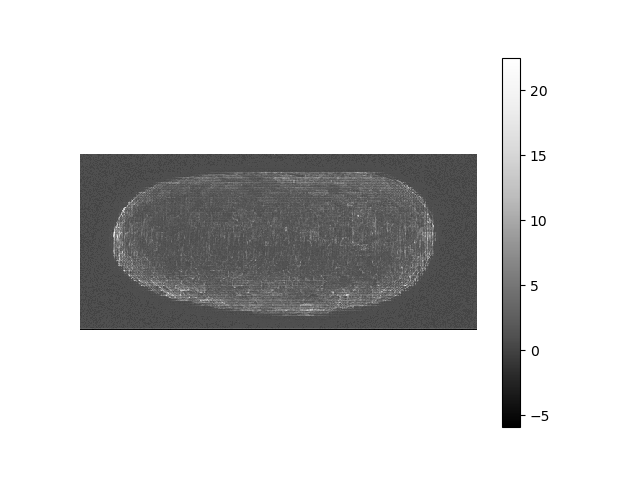
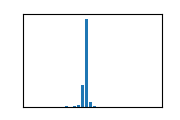

In [14]:
stackview.insight(reduced_halo)

In [27]:
from skimage import filters
from skimage import morphology
import tifffile as tiff

down_cropped = np.load("../outs/down_cropped_Strong_halo_bad_mask.npy")
tiff.imwrite("../outs/down_cropped_Strong_halo_bad_mask.tif", down_cropped)
def threshold_image_xy(volume: np.ndarray):
    max_projection = np.max(volume, axis=0)
    img_median = filters.median(max_projection, morphology.disk(5)) # TODO: need to replace with something based on pixel size in um

    th = filters.threshold_triangle(img_median)
    return img_median >= th
reduced_halo = wavelet_background_subtraction(down_cropped, wavelet='db1', level=2)

stackview.slice(threshold_image_xy(reduced_halo), continuous_update=True)

In [24]:
stackview.slice(threshold_image_xy(down_cropped), continuous_update=True)